In [37]:
import pandas as pd

In [38]:
df = pd.read_csv("D:\\ML\\23. ML - Polynomial (Multiple) Regression  Data - 1.csv")
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x = df.drop('price', axis=1)
x.head()

,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,1672.0,3,8971.291866,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,1750.0,3,8514.285714,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,1750.0,3,8571.428571,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,1250.0,2,3200.000000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,1200.0,2,6916.666667,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x.shape

(7120, 107)

In [41]:
y = df['price']
y.head()

0    150.0
1    149.0
2    150.0
3     40.0
4     83.0
Name: price, dtype: float64

## Use train_test_split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=20)

In [44]:
print(x_train.shape,x_test.shape , y_train.shape , y_test.shape)

(5696, 107) (1424, 107) (5696,) (1424,)


## Linear Regression

In [45]:
from  sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [46]:
lr.fit(x_train , y_train)

LinearRegression()

### x_train predection

In [47]:
Z = lr.predict(x_train)
Z

array([112.53789318,  33.10097852,  48.71683377, ...,  29.06053594,
       129.96178442,  30.05504086])

In [48]:
import matplotlib.pyplot as plt

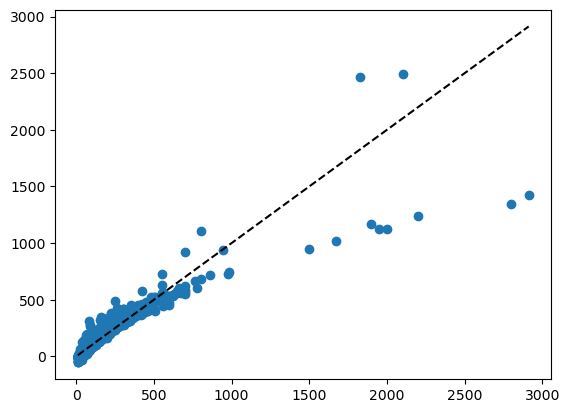

In [49]:
plt.scatter(y_train , Z)
plt.plot([y_train.min() , y_train.max()],[min(y_train) , max(y_train)] , 'k--')

### x_test predection

In [50]:
Z1 = lr.predict(x_test)
Z1

array([114.41865768,  75.64075381, 103.03663446, ...,  86.50627789,
        64.81764324,  97.08960105])

In [51]:
y_test

3325    110.00
5401     68.00
3766     99.00
500      25.00
4149     55.55
         ...  
4837     50.00
575      50.00
5721     91.00
6360     68.29
1284     90.00
Name: price, Length: 1424, dtype: float64

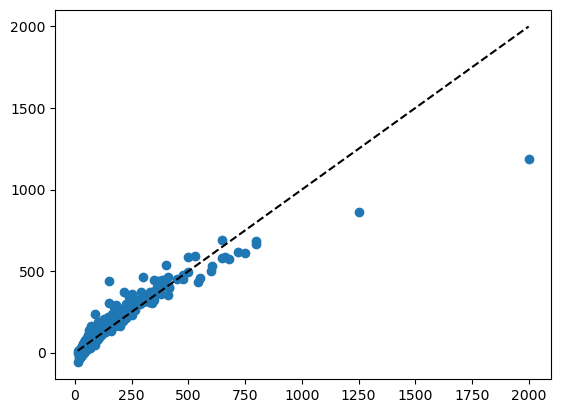

In [52]:
plt.scatter(y_test , Z1)
plt.plot([y_test.min() , y_test.max()],[min(y_test) , max(y_test)] , 'k--')

## Standard Scaler

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [54]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

## Polynomial regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

In [56]:
x_train_poly = poly.fit_transform(x_train_sc)
x_test_poly = poly.transform(x_test_sc)

In [57]:
poly.fit(x_train_poly , y_train)               ## no need to use fit & predict in Polynomial feature

## Again Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()

In [59]:
lr1.fit(x_train_poly,y_train)         

LinearRegression()

## For x_train_poly

In [60]:
Z2 = lr1.predict(x_train_poly)
Z2

array([120.  ,  56.  ,  54.  , ...,  47.12, 128.  ,  47.  ])

In [61]:
y_train

5836    120.00
3188     56.00
327      54.00
3131     48.75
6047     55.00
         ...  
1428    475.00
6537     85.00
7068     47.12
4367    128.00
2522     47.00
Name: price, Length: 5696, dtype: float64

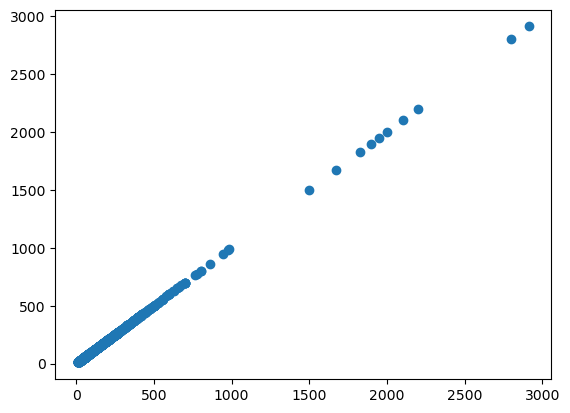

In [62]:
plt.scatter(y_train, Z2 )

In [63]:
from sklearn.metrics import r2_score

In [64]:
r2_score(y_train  , Z2)

1.0

## For x_test_poly

In [65]:
Z3 = lr1.predict(x_test_poly)
Z3

array([110.  ,  68.  ,  99.  , ...,  91.  ,  68.29,  90.  ])

In [66]:
y_test

3325    110.00
5401     68.00
3766     99.00
500      25.00
4149     55.55
         ...  
4837     50.00
575      50.00
5721     91.00
6360     68.29
1284     90.00
Name: price, Length: 1424, dtype: float64

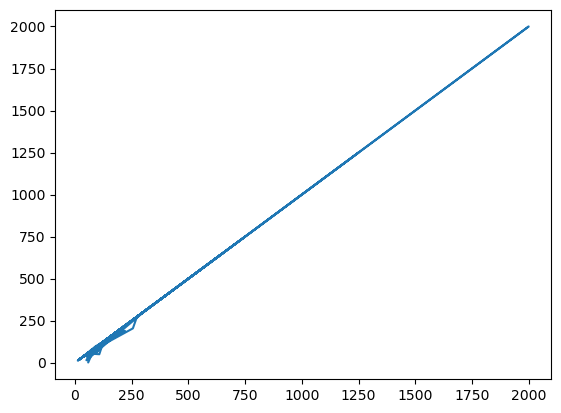

In [67]:
plt.plot(y_test, Z3)

### r2_score

In [68]:
from sklearn.metrics import r2_score

In [69]:
r2_score(y_test,Z3)

0.9990844370397954

## Mean_square_Error & Root_mean_square Error

In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, Z3)
rmse = np.sqrt(mse)

mse, rmse

(10.082085262510072, 3.175229954272615)